**Intracellular electrolyte homeostasis in the setting of altered Na+/K+ pupm activity/turnover rate due to a step change in temperatur.** (see Figure 3A in Maleckar et al. 2020)

Explaination

In [1]:
import numpy as np
from scipy.integrate.odepack import odeint
import matplotlib.pyplot as plt

In [2]:
import functions
from chondrocyte import Voltage_clamp
from params import params_dict

In [3]:
# define time span
params_dict["t_final"] = 50
t_final = params_dict["t_final"]
params_dict["dt"] = 1e-2
dt = params_dict["dt"]
t = np.linspace(0, t_final, int(t_final/dt))

In [4]:
# Define initial condition vector
y0 = (params_dict["V_0"], params_dict["Na_i_0"], params_dict["K_i_0"], params_dict["Ca_i_0"], params_dict["H_i_0"], 
      params_dict["Cl_i_0"], params_dict["a_ur_0"], params_dict["i_ur_0"], params_dict["vol_i_0"], 
      params_dict["cal_0"])

Simulation for 23C

In [5]:
#set simulation specific parameters
params_dict["I_NaK_scale"] = 1.625
params_dict["I_NaK_bar"] = params_dict["I_NaK_scale"]*70.8253*params_dict["C_m"]/params_dict["C_myo"]

In [6]:
#solve the ODE system which is imported with chondrocyte
solution23 = odeint(functions.rhs, y0, t, args=(params_dict,))

In [7]:
VV, current23 = Voltage_clamp(solution23)

Simulation for 37C

In [8]:
params_dict["I_NaK_scale"] = 1.625*4.65
params_dict["I_NaK_bar"] = params_dict["I_NaK_scale"]*70.8253*params_dict["C_m"]/params_dict["C_myo"]

In [9]:
solution37 = odeint(functions.rhs, y0, t, args=(params_dict,))
VV, current37 = Voltage_clamp(solution37)

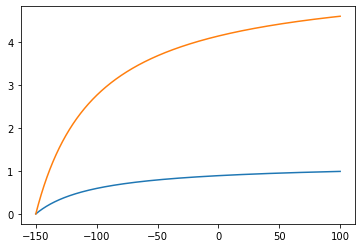

In [23]:
plt.plot(VV, current23["I_NaK"])
plt.plot(VV, current37["I_NaK"])